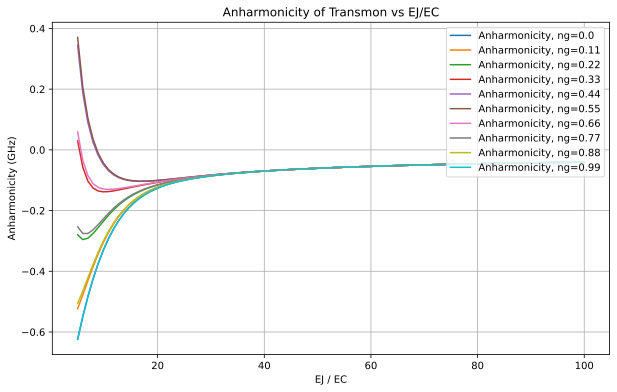

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scqubits as scq

# Plotting
plt.figure(figsize=(10, 6))

ng_list = np.linspace(0, 0.99, 10)

for ng in ng_list:
    # Define a range of EJ/EC ratios
    EJ_over_EC_values = np.linspace(5, 100, 100)  # Adjust the range and resolution as needed
    anharmonicity_values = []

    # Loop through the range and calculate anharmonicity for each EJ/EC ratio
    for EJ_over_EC in EJ_over_EC_values:
        # Assuming a fixed EC, calculate the corresponding EJ
        EC = 1.0  # Choose a value for EC, e.g., 1 GHz
        EJ = EJ_over_EC * EC
        
        # Create a transmon object with the given EJ and EC
        transmon = scq.Transmon(EJ=EJ, EC=EC, ng=ng, ncut=40)
        
        # Calculate the energy levels
        energy_levels = transmon.eigenvals(evals_count=3)  # We need at least 3 energy levels
        
        # Calculate the anharmonicity: difference between E12 and E01
        E01 = energy_levels[1] - energy_levels[0]
        E12 = energy_levels[2] - energy_levels[1]
        anharmonicity = (E12 - E01)/E01
        
        anharmonicity_values.append(anharmonicity)


    plt.plot(EJ_over_EC_values, anharmonicity_values, label=f'Anharmonicity, ng={round(ng, 2)}')

plt.xlabel('EJ / EC')
plt.ylabel('Anharmonicity (GHz)')
plt.title('Anharmonicity of Transmon vs EJ/EC')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()
